In [3]:
import pandas as pd
import os

# Define the paths
source_path = '/kaggle/input/plagiarismtest100files/TestData2/source'
suspicious_path = '/kaggle/input/plagiarismtest100files/TestData2/suspeciuos'

# Load the source texts
source_files = os.listdir(source_path)
source_texts = [open(os.path.join(source_path, file)).read() for file in source_files]

# Load the suspicious texts
suspicious_files = os.listdir(suspicious_path)
suspicious_texts = [open(os.path.join(suspicious_path, file)).read() for file in suspicious_files]

# Create a DataFrame
data = pd.DataFrame({
    'text': source_texts + suspicious_texts,
    'label': [0] * len(source_texts) + [1] * len(suspicious_texts)  # 0 for source, 1 for suspicious
})

print(data.head())


                                                text  label
0  ﻿LAWRENCE J. BURPEE, Librarian Ottawa Public L...      0
1  ﻿Die Aufforderung geschieht etwa in der Form: ...      0
2  ﻿Univ. of Nebraska. Univ. of Wisconsin. Harvar...      0
3  ﻿BLACKWOOD'S\n\n  EDINBURGH MAGAZINE.\n\n  No....      0
4  ﻿"My girl," Evellin would often say to Isabel,...      0


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and stem
    text = ' '.join(ps.stem(word) for word in text.split() if word not in stop_words)
    return text

# Apply the cleaning function
data['cleaned_text'] = data['text'].apply(clean_text)
print(data.head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                text  label  \
0  ﻿LAWRENCE J. BURPEE, Librarian Ottawa Public L...      0   
1  ﻿Die Aufforderung geschieht etwa in der Form: ...      0   
2  ﻿Univ. of Nebraska. Univ. of Wisconsin. Harvar...      0   
3  ﻿BLACKWOOD'S\n\n  EDINBURGH MAGAZINE.\n\n  No....      0   
4  ﻿"My girl," Evellin would often say to Isabel,...      0   

                                        cleaned_text  
0  lawrenc j burpe librarian ottawa public librar...  
1  die aufforderung geschieht etwa der form darf ...  
2  univ nebraska univ wisconsin harvard univ vol ...  
3  blackwood edinburgh magazin ccclxv march 1846 ...  
4  girl evellin would often say isabel king must ...  


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['label'].values


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Classifier:
Accuracy: 0.575
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        21
           1       0.54      0.79      0.64        19

    accuracy                           0.57        40
   macro avg       0.60      0.59      0.56        40
weighted avg       0.60      0.57      0.56        40

SVM Classifier:
Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        21
           1       0.52      0.74      0.61        19

    accuracy                           0.55        40
   macro avg       0.57      0.56      0.54        40
weighted avg       0.57      0.55      0.54        40

Gradient Boosting Classifier:
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        21
           1       0.57      0.68      0.62        19

    accuracy                           0.60        40
   macro av

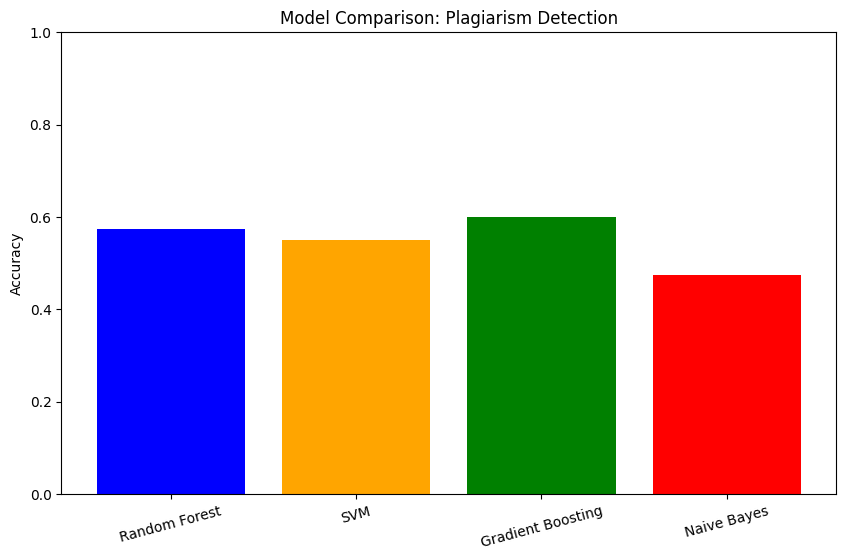

In [14]:
import matplotlib.pyplot as plt
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': MultinomialNB()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Classifier:")
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Plagiarism Detection')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

In [21]:
import joblib

# Assuming you have already trained your models and vectorizer
# models should be named as follows:
# rf_model, svm_model, gbm_model, nb_model, vectorizer

# Save the models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(gbm_model, 'gbm_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Models and vectorizer have been saved successfully.")


Models and vectorizer have been saved successfully.


In [22]:
# Load the models and vectorizer
rf_model = joblib.load('random_forest_model.pkl')
svm_model = joblib.load('svm_model.pkl')
gbm_model = joblib.load('gbm_model.pkl')
nb_model = joblib.load('naive_bayes_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

print("Models and vectorizer have been loaded successfully.")


Models and vectorizer have been loaded successfully.


In [17]:
def detect_plagiarism(text):
    # Clean the input text
    cleaned_text = clean_text(text)
    
    # Vectorize the cleaned text
    text_vector = loaded_vectorizer.transform([cleaned_text]).toarray()
    
    # Make a prediction
    prediction = loaded_svm_model.predict(text_vector)
    
    # Return the result
    return "Plagiarized" if prediction[0] == 1 else "Not Plagiarized"


In [19]:
input_text = """
'An address? Whose?'

'Well,' he said, without looking at her, 'I fancy there are still some of the Blakes, (the
word came out with a certain effort) 'living at Bilton, and perhaps you could find out from
them the address I want; or, perhaps,' he added quickly, for she understood now, and eager
words were on her lips, 'perhaps you know.

He had not slept very much during the night, for his mind had been too full of the change that
was coming in his life, and of the difference that the presence of Edith and little Zoe would
make in the dull, old house. Sad and worn and altered, was she! Ah! that would soon pass
away with kindness and care and happiness, and the cough that had sounded so hollow and ominous
should be nursed away, and Edith should be a girl again, a girl as she ought to be yet by right
of her years; and those five years of suffering and estrangement should be altogether forgotten
as if they had never been.

He went into the bedroom next his, that had been Edith's--that was to be Edith's again--and,
looking round it, noticed with satisfaction that Jane had kept it just as it had been in the
old days; and he pushed the bed a little to one side to make room for a cot to stand beside
it, a cot which he remembered in the night as having stood for years in the lumber-room up
in the roof, and which he now with much difficulty dragged out from behind some heavy boxes,
and fitted together, wishing there had been time to give it a coat of paint, and yet glad,
with a tremulous sort of gladness, that there was not, seeing that it would be wanted that
very night.

And just then Jane Sands came up to call him to breakfast, and stood looking from the cot to
her master's dusty coat, with such a look of delighted comprehension on her face, that the
organist felt that no words were needed to prepare her for what was going to happen.

'I thought,' he said, 'it had better be brought down.'

'Where shall it go?' she asked.

'In Miss----in the room next mine,' he said, 'and it will want a good airing.'

'Shall I make up the bed too?' she asked.

'Yes, you may as well.'

'Oh, master,' she said, the tears shaking in her voice and shining in her eyes; 'will they
be wanted soon? Will they, maybe, be wanted to-night?'

His own voice felt suspiciously shaky; his own eyes could not see the old cot, nor Jane's beaming
face quite plainly, so he only gave a gruff assent and turned away.

'What a good, kind creature she is!' he thought. 'What a welcome she will give Edith and Edith's
little Zoe!'

During the morning he heard her up in the room sweeping and scrubbing, as if for these five
years it had been left a prey to dust and dirt; and when he went out after dinner to give a
lesson at Bilton, she was still at it with an energy worthy of a woman, half her age.

That stupid little girl at Bilton, who generally found her music-lesson such an intolerable
weariness to the flesh, and was conscious that it was no less so to her teacher, found the
half-hour to-day quite pleasant. Mr Robins had never been so kind and cheerful, quite amusing,
laughing at her mistakes, and allowing her to play just the things she knew best, and to get
up in the middle of the lesson to go to the window and see a long procession of gypsy vans
going by to Smithurst fair.

It was such a very beautiful day; perhaps it was this that produced such a good effect on the
organist's temper. There had been a frost that morning, but it was not enough to strip the
trees, but only to turn the elms a richer gold, and the beeches a warmer red, and the oaks
a ruddier brown; while in the hedges the purple dogwood, and hawthorn, and bramble leaves made
a wonderful variety of rich tints in the full bright sunshine, which set the birds twittering
with a momentary delusion that it might be spring.
"""

result = detect_plagiarism(input_text)
print(f'Text: "{input_text[:50]}..." - Result: {result}') 


Text: "
'An address? Whose?'

'Well,' he said, without lo..." - Result: Plagiarized


In [20]:
input_text ="""But how different from the clean steams and beautiful green sward of our English woods!  Here,
you were confined to a quagmire by impervious underwood of prickly pear, penguin, and speargrass;
and when we rode under the drooping branches of the trees, that the leaves might brush away
the halo of musquittoes, flying ants, and other winged plagues that buzzed about our temples,
we found, to our dismay, that we had made bad worse by the introduction of a whole colony of
garapatos, or wood--ticks, into our eyebrows and hair.  At length, for the second time, so
far as I was concerned, we reached the reached the headquarters at Torrecilla, and were well
received by the Spanish commander--in--chief, a tall, good--looking, soldierlike man, whose
personal qualities had an excellent foil in the captain--general of the province, an old friend
of mine, as already mentioned, and who certainly looked full as like a dancing--master, or,
at the best, perruquier en general to the staff, as a viceroy.

General Morillo, however, had a great share of Sancho Panza shrewdness, and I will add kindness,
about him.  We were drenched and miserable when we arrived, yet he might have turned us over,
naturally enough, to the care of his staff.  No such thing; the first thing he did was to walk
both of us behind a canvass screen, that shut off one end of the large barnlike room, where
a long table was laid for dinner.  This was his sleeping apartment, and drawing out of a leather
bag two suits of uniform, he rigged us almost with his own hands.  Presently a point of war
was sounded by half--a--dozen trumpeters, and Splinter and I made our appearance each in the
dress of a Spanish general.  The party consisted of Morillo's personal staff, the captain--general,
the inquisidor general, and several colonels and majors of different regiments.  In all, twenty
people sat down to dinner; among whom were several young Spanish noblemen, some of whom I had
met on my former visit, who, having served in the Peninsular war under the great Duke, made
their advances with great cordiality. Strange enough--Splinter and I were the only parties
present in uniform; all the others, priests and soldiers, were clothed in gingham coats and
white trowsers.

The besieging force at this time was composed of about five thousand Spaniards, as fine troops
as I ever saw, and three thousand Creoles under the command of that desperate fellow Morales.
I was not long in recognising an old friend of mine in the person of Captain Bayer, an aide--de--camp
of Morillo, amongst the company.  He was very kind and attentive, and rather startled me by
speaking very tolerable English now, from a kindly motive I make no question, whereas, when
I had known him before in Kingston, he professed to speak nothing but Spanish or French. He
was a German by birth, and lived to rise to the rank of colonel in the Spanish army, where
he subsequently greatly distinguished himself, but he at length fell in some obscure skirmish
in New Granada; and my old ally Morillo, Count of Carthagena, is now living in penury, an exile
in Paris.

After being, as related, furnished with food and raiment, we retired to our quatres, a most
primitive sort of couch, being a simple wooden frame, with a piece of canvass stretched over
it.  However, if we had no mattresses, we had none of the disagreeables often incidental to
them, and, fatigue proved a good opiate, for we slept soundly until the drums and trumpets
of the troops, getting under arms, awoke us at daylight.  The army was under weigh to occupy
Carthagena, which had fallen through famine, and we had no choice but to accompany it.

I knew nothing of the misery of a siege but by description; the reality even to me, case--hardened
as I was by my own recent sufferings, was dreadful.  We entered by the gate of the raval, or
suburb.  There was not a living thing to be seen in the street; the houses had been pulled
down, that the fire of the place might not be obstructed in the event of a lodgment in the
outwork.  We passed on, the military music echoing mournfully amongst the ruined walls, to
the main gate, or Puerto de Tiera, which was also open, and the drawbridge lowered.  Under
the archway, we saw a delicate female, worn to the bone, and weak as an infant, gathering garbage
of the most loathsome description, the possession of which had been successfully disputed by
a carrion crow.  A little farther on, the bodies of an old man and two small children were
putrefying in the sun, while beside them lay a misererable, wasted, dying negro, vainly endeavouring
to keep at a distance with a palm branch a number of the same obscene birds that were already
devouring the carcass of one of the infants; before two hours, the faithful servant, and those
he attempted to defend, were equally the prey of the disgusting gallinaso.  The houses, as
we proceeded, appeared entirely deserted, except where a solitary spectre like inhabitant appeared
at a balcony, and feebly exclaimed, "Viva, los Espanoles!  Viva, Fernando Septimo!"--We saw
no domestic animal whatsoever, not even a cat or a dog; but I will not dwell on these horrible
details any longer.

One morning, shortly after our arrival, as we strolled beyond the land gate, we came to a place
where four banquillos (a sort of short bench or stool, with an upright post at one end firmly
fixed into the ground) were placed opposite a dead wall.  They were painted black, and we were
not left long in suspense as to their use; for solemn music, and the roll of muffled drums
in the distance, were fearful indications of what we were to witness.

First came an entire regiment of Spanish infantry, which, filing off, formed three sides of
a square,--the wall near which the banquillos were placed forming the fourth; then eight priests,
and as many choristers chanting the service for the dying; next came several mounted officers
of the staff, and four firing parties of twelve men each.  Three Spanish American prisoners
followed, dressed in white, with crucifixes in their hands, each supported, more dead than
alive, by two priests; but when the fourth victim appeared, we could neither look at nor think
of any thing else.

On enquiry we found he was an Englishman, of the name of S----: English, that is, in all except
the place of his birth, for his whole education had been English, as were his parents and all
his family; but it came out, accidentally I believe, on his trial, that he had been born at
Buenos Ayres, and having joined the patriots, this brought treason home to him, which he was
now led forth to expiate.  Whilst his fellow--sufferers appeared crushed down to the very earth,
under their intense agony, so that they had to be supported as they tottered towards the place
of execution, he stepped firmly and manfully out, and seemed impatient when at any time, from
the crowding in front, the procession was obliged to halt.  At length they reached the fatal
spot, and his three companions in misery being placed astride on the banquillos, their arms
twisted round the upright posts, and fastened to them with cords, their backs being towards
the soldiers.  Mr S----walked firmly up to the vacant bench, knelt down, and covering his face
with his hands, rested his head on the edge of it.  For a brief space he seemed to be engaged
in prayer, during which he sobbed audibly, but soon recovering himself, he rose, and folding
his arms across his breast, sat down slowly and deliberately on the banquillo, facing the firing
party with an unshrinking eye.

He was now told that he must turn his back and submit to be tied like the others.  He resisted
this, but on force being attempted to be used, he sprung to his feet, and stretching out his
hand, while a dark red flush passed transiently across his pale face, he exclaimed in a loud
voice, "Thus, thus, and not otherwise, you may butcher me, but I am an Englishman and no traitor,
nor will I die the death of one." Moved by his gallantry, the soldiers withdrew, and left him
standing.  At this time the sun was intensely hot, it was high noon, and the monk who attended
Mr S----held an umbrella over his head; but the preparations being completed, he kissed him
on both cheeks, while the hot tears trickled down his own, and was stepping back, when the
unhappy man said to him, with the most perfect composure, "Todavia padre, todavia, mucho me
gusta la sombra." But the time had arrived, the kind--hearted monk was obliged to retire. 
The signal was given, the musketry rattled, and they were as clods of the valley "Truly," quoth
old Splinter, "a man does sometimes become a horse by being born in a stable."

Some time after this we were allowed to go to the village of Turbaco, a few miles distant from
the city, for change of air.  On the third morning after our arrival, about the dawning, I
was suddenly awakened by a shower of dust on my face, and a violent shaking of the bed, accompanied
by a low grumbling unearthly noise, which seemed to pass immediately under where I lay.  Were
I to liken it to any thing I had ever experienced before, it would be to the lumbering and
tremor of a large waggon in a tempestuous night, heard and felt through the thin walls of a
London house.--Like--yet how fearfully different!

In a few seconds the motion ceased, and the noise gradually died away in hollow echoes in the
distance--whereupon ensued such a crowing of cocks, cackling of geese, barking of dogs, lowing
of kine, neighing of horses, and shouting of men, women, and children amongst the negro and
coloured domestics, as baffles all description, whilst the various white inmates of the house
(the rooms, for air and coolness, being without ceiling, and simply divided by partitions run
up about ten feet high) were, one and all, calling to their servants and each other, in accents
which did not by any means evince great composure.  In a moment this hubbub again sank into
the deepest silence--man, and the beasts of the field, and the fowls of the air, became mute
with breathless awe, at the impending tremendous manifestation of the power of that Almighty
Being in whose hands the hills are as a very little thing--for the appalling voice of the earthquake
was once more heard growling afar off, like distant thunder mingling with the rushing of a
mighty wind, waxing louder and louder as it approached, and upheaving the sure and firm--set
earth into long undulations, as if its surface had been the rolling swell of the fathomless
ocean.  The house rocked, pictures of saints fell from the walls, tables and chairs were overturned,
the window frames were forced out of their embrasures and broken in pieces, beams and rafters
groaned and screamed, crushing the tiles of the roof into ten thousand fragments.  In several
places the ground split open into chasms a fathom wide, with an explosion like a cannon--shot;
the very foundation of the house seemed to be sinking under us; and whilst men and women rushed
like maniacs naked into the fields, with a yell as if the Day of Judgment had arrived, and
the whole brute creation, in an agony of fear, made the most desperate attempts to break forth
from their enclosures into the open air, the end wall of my apartment was shaken down; and
falling outwards with a deafening crash, disclosed, in the dull grey mysterious twilight of
morning, the huge gnarled trees that overshadowed the building, bending and groaning, amidst
clouds of dust, as if they had been tormented by a tempest, although the air was calm and motionless
as death.

CHAPTER V

The Piccaroon

"Ours the wild life in tumult still to range."

BYRON, THE CORSAIR, I. 7.

Some time after this, we once more returned to Carthagena, to be at hand should any opportunity
occur for Jamaica, and A.--Jwere lounging about one forenoon on the fortifications, looking
with sickening hearts out to seaward, when a voice struck up the following negro ditty close to us:

"Fader was a Corramantee, Moder was a Mingo, Black picaniny buccra wantee, So dem sell a me
Peter, by jingo, Jiggery, jiggery, jiggery."

"Well sung, Massa Bungo," exclaimed Mr Splinter; "where do you hail from, my hearty?"

"Hiflo!  Bungo, indeed! free and easy dat, anyhow.  Who you yousef, eh?"

"Why, Peter," continued the Lieutenant, "don't you know me?" "Cannot say dat I do," rejoined
the negro, very gravely, without lifting his head, as he sat mending his jacket in one of the
embrasures near the water gate of the arsenal--"Have not de honour of your acquaintance, sir."

He then resumed his scream, for song it could not be called:--

"Mammy Sally's daughter, Lose him shoe in an old canoe, Dat lay halffull of water, And den
she knew not what to do. Jiggery, jig"--

"Confound your jiggery, jiggery, sir!  But I know you well enough, my man; and you can scarcely
have forgotten Lieutenant Splinter of the Torch, one would think?"

However, it was clear that the poor fellow really had not known us; for the name so startled
him, that, in his hurry to unlace his legs from under him, as he sat tailor--fashion, he fairly
capsized out of his perch, and toppled down on his nose--a feature fortunately so flattened
by the hand of nature, that I question if it could have been rendered more obtuse had he fallen
out of the maintop on a timber--head, or a marine officer's.

"Eh!--no--yes, him sure enough; and who is de picaniny hofficer--Oh! I see, Massa Tom Cringle?
Garamighty, gentlemen, where have you drop from?--Where is de old Torch?  Many a time hab I
Peter Mangrove, pilot to Him Britanic Magesty squadron, taken de old brig in and through amongst
de keys at Port Royal!"

"Ay, and how often did you scour her copper against the coral reefs, Peter?"

His Majesty's pilot gave a knowing look, and laid his hand on his breast "No more of dat if
you love me, massa."

"Well, well, it don't signify now, my boy; she will never give you that trouble again--foundered--all
hands lost, Peter, but the two you see before you."

"Werry sorry, Massa Plinter, werry sorry--What! de black cooksmate and all?--But misfortune
can't be help.  Stop till I put up my needle, and I will take a turn wid you." Here he drew
himself up with a great deal of absurd gravity.  "Proper dat British hofficer in distress should
assist one anoder--We shall consult togeder.--How can I serve you?"

"Why, Peter, if you could help us to a passage to Port Royal, it would be serving us most essentially.
When we used to be lying there, a week seldom passed without one of the squadron arriving from
this; but here have we been for more than a month, without a single pennant belonging to the
station having looked in: our money is running short, and if we are to hold on in Carthagena
for another six weeks, we shall not have a shot left in the locker--not a copper to tinkle
on a tombstone."

The negro looked steadfastly at us, then carefully around.  There was no one near.

"You see, Massa Plinter, I am desirable to serve you, for one little reason of my own; but,
beside dat, it is good for me at present to make some friend wid de hofficer of de squadron,
being as how dat I am absent widout leave."

"Oh, I perceive--a large R against your name in the master attendant's books, eh?"

"You have hit it, sir, werry close; besides I long mosh to return to my poor wife, Nancy Cator,
dat I leave, wagabone dat I is, just about to be confine."

I could not resist putting in my oar.

"I saw Nancy just before we sailed, Peter,--fine child that; not quite so black as you, though."

"Oh, massa," said Snowball, grinning and showing his white teeth, "you know I am soch a terrible
black fellow--But you are a leetle out at present, massa--I meant, about to be confine in de
workhouse, for stealing de admiral's Muscovy ducks;" and he laughed loud and long.--"However,
if you will promise dat you will stand my friends, I will put you in de way of getting a shove
across to de east end of Jamaica; and I will go wid you, too, for company."

"Thank you," rejoined Mr Splinter; "but how do you mean to manage this? There is no Kingston
trader here at present, and you don't mean to make a start of it in an open boat, do you?"

"No, sir, I don't; but in de first place--as you are a gentleman, will you try and get me off
when we get to Jamaica?  Secondly, wi you promise dat you will not seek to know more of de
vessel you may go in, nor of her crew, than dey are willing to tell you, provided you are landed
safe?"

"Why, Peter, I scarcely think you would deceive us, for you know I saved your bacon in that
awkward affair, when through drunkenness you plumped the Torch ashore, so"--

"Forget dat, sir,----forget dat!--Never shall poor black pilot forget how you saved him from
being seized upt when de gratings, boatswain's mates, and all, were ready at de gangway@never
shall poor black rascal forget dat."

"Indeed I do not think you would wittingly betray us into trouble, Peter; and as I guess you
mean one of the forced traders, we will venture in her, rather than kick about here any longer,
and pay a moderate sum for our passage."

"Den wait here five minute,"--and so saying he slipt down through the embrasure into a canoe
that lay beneath, and in a trice we saw him jump on board of a long low nondescript kind of
craft, that lay moored within pistol--shot of the walls.

She was a large shallow vessel, coppered to the bends, of great breadth of beam, with bright
sides, like an American, so painted as to give her a clumsy mercantile sheer externally, but
there were many things that belied this to a nautical eye: her copper, for instance, was bright
as burnished gold on her very sharp bows and beautiful run; and we could see from the bastion
where we stood, that her decks were flush and level.  She had no cannon mounted that were visible,
but we distinguished grooves on her well--scrubbed decks, as from the recent traversing of
carronade slides, while the bolts and rings in her high and solid bulwarks shone clear and
bright in the ardent noontide.  There was a tarpawling stretched over a quantity of rubbish,
old sails, old junk, and hencoops rather ostentatiously piled up forward, which we conjectured
might conceal a long gun.

She was a very taught--rigged hermaphrodite, or brig forward and schooner aft.  Her foremast
and bowsprit were immensely strong and heavy, and her mainmast was so long and tapering, that
the wonder was, how the few shrouds and stays about it could support it: it was the handsomest
stick we had ever seen.  Her upper spars were on the same scale, tapering away through topmast,
topgallant--mast, royal and skysail--masts, until they fined away into slender wands.  The
sails, that were loose to dry, were old, and patched, And evidently displayed to cloak the
character of the vessel, by an ostentatious show of their unserviceable condition, but her
rigging was beautifully fitted, every rope lying in the chafe of another being carefully served
with hide.  There were several large bushy--whiskered fellows lounging about the deck, with
their hair gathered into dirty net bags, like the fishermen of Barcelona; many had red silk
sashes round their waists, through which were stuck their long knives, in shark--skin sheaths.
Their numbers were not so great as to excite suspicion; but a certain daring reckless manner,
would at once have distinguished them, independently of any thing else, from the quiet, hard--worked,
redshirted merchant seaman.

"That chap is not much to be trusted," said the Lieutenant; "his bunting would make a few jackets
for Joseph, I take it." But we had little time to be critical before our friend Peter came
paddling back with another blackamoor in the stem, of as ungainly an exterior as could well
be, imagined.  He was a very large man, whose weight every now and then, as they breasted the
short sea, cocked up the snout of the canoe with Peter Mangrove in it, as if he had been a
cork, leaving him to flourish his paddle in the air, like the weatherwheel of a steam--boat
in a sea--way. The new comer was strong and broad--shouldered, with long muscular arms, and
a chest like Hercules; but his legs and thighs were, for his bulk, remarkably puny and misshapen.
A thick fell of black wool, in close tufts, as if his face had been stuck full of cloves, covered
his chin and upper lip; and his hair, if hair it could be called, was twisted into a hundred
short plaits, that bristled out, and gave his head, when he took his hat off, the appearance
of a porcupine.  There was a large sabre--cut across his nose, and down his cheek, and he wore
two immense gold earrmgs. His dress consisted of short cotton drawers, that did not reach within
two inches of his knee, leaving his thin cucumber shanks (on which the small bullet--like calf
appeared to have been stuck before, through mistake, in place of abaft) naked to the shoe;
a check shirt, and an enormously large Panama hat, made of a sort of cane, split small, and
worn shovel--fashion. Notwithstanding, he made his bow by no means ungracefully, and offered
his services in choice Spanish, but spoke English as soon as he heard who we were.

"Pray, sir, are you the master of that vessel?" said the lieutenant.

"No, sir, I am the mate, and I learn you are desirous of a passage to Jamaica." This was spoken
with a broad Scotch accent.

"Yes, we are," said I, in very great astonishment; "but we will not sail with the devil; and
who ever saw a negro Scotchman before, the spirit of Nicol Jarvie conjured into a blackamoor's
skin!"

The fellow laughed.  "I am black, as you see; so were my father and mother before me." And
he looked at me, as much as to say, I have read the book you quote from.  "But I was born in
the good town of Port--Glasgow, notwithstanding, and many a voyage I have made as cabin--boy
and cook, in the good ship the Peggy Bogle, with worthy old jock Hunter; but that matters not.
I was told you wanted to go to Jamaica; I dare say our captain will take you for a moderate
passagemoney.  But here he comes to speak for himself.--Captain Vanderbosh, here are two shipwrecked
British officers, who wish to be put on shore on the east end of Jamaica; will you take them,
and what will you charge for their passage?"

The man he spoke to was nearly as tall as himself; he was a sunburnt, angular, raw--boned,
iron--visaged veteran, with a nose in shape and colour like the bowl of his own pipe, but not
at all, according to the received idea, like a Dutchman.  His dress was quizzical enoughwhite
trowsers, a long--flapped embroidered waistcoat, that might have belonged to a Spanish grandee,
with an old--fashioned French--cut coat, showing the frayed marks where the lace had been stripped
off, voluminous in the skirts, but very tight in the sleeves, which were so short as to leave
his large bony paws, and six inches of his arm above the wrist, exposed; altogether, it fitted
him like a purser's shirt on a handspike.

"Vy, for von hondred thaler, I will land dem safe in Mancheoneal Bay; but how shall ve manage,
Villiamson?  De cabin vas point yesterday."

The Scotch negro nodded.  "Never mind; I dare say the smell of the paint won't signify to the
gentlemen."

The bargain was ratified, we agreed to pay the stipulated sum, and that same evening, having
dropped down with the last of the seabreeze, we set sail from Bocca Chica, and began working
up under the lee of the headland of Punto Canoa.  When off the San Domingo Gate, we burned
a blue light, which was immediately answered by another in shore of us.  In the glare, we could
perceive two boats, full of men.  Any one who has ever played at snapdragon, can imagine the
unearthly appearance of objects when seen by this species of firework.  In the present instance,
it was held aloft on a boat--hook, and cast a strong spectral light on the band of lawless
ruffians, who were so crowded together, that they entirely filled the boats, no part of which
could be seen.  It seemed as if two clusters of fiends, suddenly vomited forth from hell, were
floating on the surface of the midnight sea, in the midst of brimstone flames.  In a few moments,
our crew was strengthened by about forty as ugly Christians as I ever set eyes on. They were
of all ages, countries, complexions, and tongues, and looked as if they had been kidnapped
by a pressgang, as they had knocked off from the Tower of Babel.  From the moment they came
on board, Captain Vanderbosh was shorn of all his glory, and sank into the petty officer, while,
to our amazement, the Scottish negro took the command, evincing great coolness, energy, and
skill.  He ordered the schooner to be wore, as soon as we had shipped the men, and laid her
head off the land, then set all hands to shift the old suit of sails, and to bend new ones.

"Why did you not shift your canvass before we started?" said I to the Dutch captain, or mate,
or whatever he might be.

"Vy vont you be content to take a quiet passage and hax no question?" was the uncivil rejoinder,
which I felt inclined to resent, until I remembered that we were in the hands of the Philistines,
where a quarrel would have been worse than useless. I was gulping down the insult as well as
I could, when the black captain came--aft, and, with the air of an equal, invited us into the
cabin to take a glass of grog.  We had scarcely sat down before we heard a noise like the swaying
up of guns, or some other heavy articles, from the hold.

I caught Mr Splinter's eye--he nodded, but said nothing.  In half an hour afterwards, when
we went on deck, we saw by the light of the moon, twelve eighteen--pound carronades mounted,
six of a side, with their accompaniments of rammers and sponges, water buckets, boxes of round,
grape, and canister, and tubs of wadding, while the combings of the hatchways were thickly
studded with round shot.  The tarpawling and lumber forward had disappeared, and there lay
long Tom ready levelled, grinning on his pivot.

The ropes were all coiled away, and laid down in regular man--of--war fashion; while an ugly
gruff beast of a Spanish mulatto, apparently the officer of the watch, walked the weather--side
of the quarter--deck, in the true pendulum style.  Look--outs were placed aft, and at the gangways
and bows, who every now and then passed the word to keep a bright look--out, while the rest
of the watch were stretched silent, but evidently broad awake, under the lee of the boat. 
We noticed that each man had his cutlass buckled round his waistthat the boarding--pikes had
been cut loose from the main boom, round which they had been stopped, and that about thirty
muskets were ranged along a fixed'rack, that ran athwart ships, near the main hatchway.

By the time we had reconnoitred thus far, the night became overcast, and a thick bank of clouds
began to rise to windward; some heavy drops of rain fell, and the thunder grumbled at a distance.
The black veil crept gradually on, until it shrouded the whole firmament, and left us in as
dark a night as ever poor devils were out in.  By and by, a narrow streak of bright moonlight
appeared under the lower edge of the bank, defining the dark outlines of the tumbling multitudinous
billows on the horizon, as distinctly as if they had been pasteboard waves in a theatre.

"Is that a sail to windward, in the clear, think you?" said Mr Splinter to me in a whisper.
At this moment it lightened vividly.  "I am sure it is," continued he--"I could see her white
canvass glance just now."

I looked steadily, and, at last, caught the small dark speck against the bright background,
rising and falling on the swell of the sea like a feather,

As we stood on, she was seen more distinctly, but, to all appearance, nobody was aware of her
proximity.  We were mistaken in this, however, for the captain suddenly jumped on a gun, and
gave his orders with a fiery energy that startled us.

"Leroux!" A small French boy was at his side in a moment.  "Forward, and call all hands to
shorten sail; but, doucement, you land crab!--Man the fore clew--garnets.--Hands by the topgallant
clewlines--peak and throat haulyards--jib down--haul--rise tacks and sheets--let go--clew up--settle
away the main--gaff there!"

In almost as short a space as I have taken to write it, every inch of canvass was close furled--every
light, except the one in the binnacle, and that was cautiously masked, carefully extinguished--a
hundred and twenty men at quarters, and the ship under bare poles.  The head yards were then
squared, and we bore up before the wind.  The stratagem proved successful; the strange sail
could be seen through the night glasses, cracking on close to the wind, evidently under the
impression that we had tacked.

"Dere she goes, chasing de Gobel," said the Dutchman.

She now burned a blue light, by which we saw she was a heavy cutter without doubt our old fellow--cruiser
the Spark.  The Dutchman had come to the same conclusion.

"My eye, Captain, no use to dodge from her; it is only dat footy little King's cutter on de
Jamaica station."

"It is her, true enough," answered Williamson; "and she is from Santa Martha with a freight
of specie, I know. I will try a brush with her by"

Splinter struck in before he could finish his irreverent exclamation.  "If your conjecture
be true, I know the craft--a heavy vessel of her class, and you may depend on hard knocks,
and small profit if you do take her; while, if she takes you"--

"I'll be hanged if she does"--and he grinned at the conceit--then setting his teeth hard, "or
rather, I will blow the schooner up with my own hand before I strike; better that than have
one's bones bleached in chains on a key at Port Royal.--But, you see you cannot control us,
gentlemen; so get down into the cable tier and take Peter Mangrove with you. I would not willingly
see those come to harm who have trusted me."

However, there was no shot flying as yet, we therefore staid on deck.  All sail was once more
made; the carronades were cast loose on both sides, and double--shotted; the long gun slewed
round; the tack of the fore--and--aft foresail hauled up, and we kept by the wind, and stood
after the cutter, whose white canvass we could still see through the gloom like a snow--wreath.

As soon as she saw us she tacked and stood towards us, and came bowling along gallantly, with
the water roaring and flashing at her bows.  As the vessels neared each other, they both shortened
sail, and finding that we could not weather her, we steered close under her lee.

As we crossed on opposite tacks her commander hailed, "Ho, the brigantine, ahoy!"

"Hillo!" sung out Blackie, as he backed his maintopsail.

"What schooner is that?"

"Ihe Spanish schooner Caridad."

"Whence, and whither bound?"

"Carthagena to Porto Rico."

"Heave--to, and send your boat on board."

"We have none that will swim, sir."

"Very well--bring--to, and I will send mine."

"Call away the boarders," said our captain, in a low stern tone; "let them crouch out of sight
behind the boat."

The cutter wore, and hove--to under our lee quarter, within pistol shot. We heard the rattle
of the ropes running through the davit blocks, and the splash of the jolly boat touching the
water, then the measured stroke of the oars, as they glanced like silver in the sparkling sea,
and a voice calling out, "Give way, my lads."

The character of the vessel we were on board of was now evident; and the bitter reflection
that we were chained to the stake on board of a pirate, on the eve of a fierce contest with
one of our own cruisers, was aggravated by the consideration that the cutter had fallen into
a snare, by which a whole boat's crew would be sacrificed before a shot was fired.

I watched my opportunity as she pulled up alongside, and called out, leaning well over the
nettings, "Get back to your ship! treachery! get back to your ship!"

The little French serpent was at my side with the speed of thought, his long clear knife glancing
in one hand, while the fingers of the other were laid on his lips.  He could not have said
more plainly, "Hold your tongue or I'll cut your throat;" but Sneezer now startled him by rushing
between us, and giving a short angry growl.

The officer in the boat had heard me imperfectly; he rose up--"I won't go back, my good man,
until I see what you are made of; and as he spoke he sprung on board, but the instant he got
over the bulwarks he was caught by two strong hands, gagged and thrown bodily down the main
hatchway.

"Heave," cried a voice, "and with a will!" and four cold 32--pound shot were hove at once into
the boat alongside, which crashing through her bottom, swamped her in a moment, precipitating
the miserable crew into the boiling sea.  Their shrieks still ring in my ears as they clung
to the oars and some loose planks of the boat.

"Bring up the officer, and take out the gag," said Williamson.

Poor Walcolm, who had been an old messmate of mine, was now dragged to the gangway half--naked,
his face bleeding, and heavily ironed, when the blackamoor, clapping a pistol to his head,
bid him, as he feared instant death, hail "that the boat had swamped under the counter, and
to send another." The poor fellow, who appeared stunned and confused, did so, but without seeming
to know what he said.

"Good God," said Mr Splinter, "don't you mean to pick up the boat's crew?"

The blood curdled to my heart as the black savage answered in a voice of thunder, "Let them
drown and be d--d! fill, and stand on!"

But the clouds by this time broke away, and the mild moon shone clear and bright once more,
upon this scene of most atrocious villainy.  By her light the cutter's people could see that
there was no one struggling in the water now, and that the people must either have been saved,
or were past all earthly aid; but the infamous deception was not entirely at an end.

The captain of the cutter, seeing we were making sail, did the same, and after having shot
ahead of us, hailed once more.

"Mr Walcolm, why don't you run to leeward, and heave--to, sir?"

"Answer him instantly, and hail again for another boat," said the sable fiend, and cocked his
pistol.

The click went to my heart.  The young midshipman turned his pale mild countenance, laced with
his blood, upwards towards the moon and stars, as one who had looked his last look on earth;
the large tears were flowing down his cheeks, and mingling with the crimson streaks, and a
flood of silver light fell on the fine features of the poor boy, as he said firmly, "Never."
The miscreant fired, and he fell dead.

"Up with the helm, and wear across her stern." The order was obeyed. "Fire!" The whole broadside
was poured in, and we could hear the shot rattle and tear along the cutter's deck, and the
shrieks and groans of the wounded, while the white splinters glanced away in all directions."""

result = detect_plagiarism(input_text)
print(f'Text: "{input_text[:50]}..." - Result: {result}') 

Text: "But how different from the clean steams and beauti..." - Result: Not Plagiarized
